In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from bs4 import BeautifulSoup
import nltk
import re

In [2]:
data = pd.read_csv("Original_Resumes.csv", sep=";")

data.head()

,Unnamed: 0,Resume,Category,Length
0,0,HAO LONG 22 Jalan Membina #04 - 70 Singapore...,Investment,3984
1,1,Koh Shi Yun Yvonne ...,Fund Accounting,7371
2,2,Lucas Tan | hp: +65 91012795 | e - mail: lucas...,Investment,5083
3,3,A pt B lk 231 Yishun S t reet 21 #06 - 414 ...,Cosec,3992
4,4,"Page 1 of 2 !!""#$%&'()"" *(+,- (!""#$%&""'%())*...",Investment,4780


In [3]:
data = data.drop(columns=["Unnamed: 0"])

In [4]:
data["Category"].value_counts()

Fund Accounting       188
Investment            126
Cosec                 113
Corp Accounting        97
Operations             95
Sales                  90
Trust                  46
Compliance             36
Administration         31
Legal                  28
Investor Relations     11
Strategy                6
Audit                   4
Name: Category, dtype: int64

In [5]:
def bs(sentence):
    #BeautifulSoup
    sentence = BeautifulSoup(sentence, "html.parser").get_text(separator=' ')
    #Suppression des caractères spéciaux
    sentence = re.sub('[^A-Za-z]+', " ", sentence)
    #Minuscules
    sentence = sentence.lower()
    
    return sentence

In [6]:
def bs_token(table, column_start, column_end):
    list_line = list()
    
    for line in table[column_start]:
        #Suppression de la ponctuation
        line = re.sub(r'(?<=[.,])(?=[^\s])', r' ', line)
        #BeautifulSoup
        line = bs(line)
        #Ajout en liste
        list_line.append(line)
            
    #Nouvelle colonne
    table[column_end] = list_line

In [7]:
bs_token(data, "Resume", "Resume1")

In [8]:
data

,Resume,Category,Length,Resume1
0,HAO LONG 22 Jalan Membina #04 - 70 Singapore...,Investment,3984,hao long jalan membina singapore language nati...
1,Koh Shi Yun Yvonne ...,Fund Accounting,7371,koh shi yun yvonne block pasir ris street sing...
2,Lucas Tan | hp: +65 91012795 | e - mail: lucas...,Investment,5083,lucas tan hp e mail lucastan gmail com singapo...
3,A pt B lk 231 Yishun S t reet 21 #06 - 414 ...,Cosec,3992,a pt b lk yishun s t reet mobile phone singapo...
4,"Page 1 of 2 !!""#$%&'()"" *(+,- (!""#$%&""'%())*...",Investment,4780,page of a b c g df f h cdf d d e f g a h a e g...
...,...,...,...,...
866,VANESSA YEUNG ! Cell: 852-5696-3332 ! E-mai...,Corp Accounting,5168,vanessa yeung cell e mail vanessa yeung gmail ...
867,"YOU RUHUI, CELINE !+65 9108 3549 ! cyruhui@...",Fund Accounting,7432,you ruhui celine cyruhui gmail com professiona...
868,"Name : WONG HANG YEE, Albee Address : Fla...",Cosec,2424,name wong hang yee albee address flat yat chi ...
869,Curriculum Vitae NICHOLAS K S CHUANG DEMIC ...,Fund Accounting,7115,curriculum vitae nicholas k s chuang demic qua...


In [9]:
ntrain, ntest = train_test_split(data, test_size=0.2)

In [10]:
vectorizer = CountVectorizer(stop_words='english', min_df=10)
Xtrain = vectorizer.fit_transform(ntrain.Resume1)

In [11]:
Xtrain_array = Xtrain.toarray()

In [12]:
clf = LogisticRegression(random_state=0, max_iter=2000).fit(Xtrain_array, ntrain.Category)

In [13]:
Xtest = vectorizer.transform(ntest.Resume1)
Xtest_array = Xtest.toarray()

In [14]:
y_pred = clf.predict(Xtest_array)

In [15]:
count1 = 0
for index in range(len(y_pred)):
    if list(y_pred)[index] == list(ntest.Category)[index]:
        print(list(y_pred)[index], "==", list(ntest.Category)[index])
        count1 += 1
print(count1)
print("===")
count2 = 0
for index in range(len(y_pred)):
    if list(y_pred)[index] != list(ntest.Category)[index]:
        print(list(y_pred)[index], "!=", list(ntest.Category)[index])
        count2 += 1
print(count2)

Fund Accounting == Fund Accounting
Fund Accounting == Fund Accounting
Fund Accounting == Fund Accounting
Corp Accounting == Corp Accounting
Sales == Sales
Trust == Trust
Cosec == Cosec
Cosec == Cosec
Investment == Investment
Investment == Investment
Fund Accounting == Fund Accounting
Investment == Investment
Cosec == Cosec
Corp Accounting == Corp Accounting
Sales == Sales
Cosec == Cosec
Investment == Investment
Cosec == Cosec
Sales == Sales
Administration == Administration
Corp Accounting == Corp Accounting
Corp Accounting == Corp Accounting
Operations == Operations
Cosec == Cosec
Administration == Administration
Cosec == Cosec
Investment == Investment
Cosec == Cosec
Cosec == Cosec
Fund Accounting == Fund Accounting
Cosec == Cosec
Trust == Trust
Investment == Investment
Sales == Sales
Investment == Investment
Cosec == Cosec
Corp Accounting == Corp Accounting
Fund Accounting == Fund Accounting
Fund Accounting == Fund Accounting
Fund Accounting == Fund Accounting
Cosec == Cosec
Corp Acco

In [16]:
count1 / len(y_pred)

0.6514285714285715

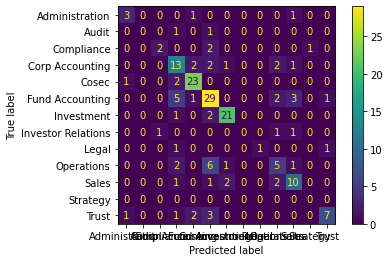

In [17]:
display(metrics.plot_confusion_matrix(clf, Xtest_array, ntest.Category))